In [1]:
import asyncio
import chess
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
from stockfish import Stockfish

from chessproc import pgnproc
from chessproc import dfproc
from chessproc.GameAnalysis import GameAnalysis

pd.set_option('display.max_columns', 100)

# Initialize Stockfish

In [2]:
sf = Stockfish(path='/opt/homebrew/bin/stockfish')
# sf.get_parameters()

# Create the Parquet from Downloaded files

In [3]:
duda = pgnproc.get_parquet_by_username('Polish_fighter3000', force_refresh=True)
duda = duda.query('White == "Hikaru" | Black == "Hikaru"')
duda

,Event,Site,Date,Round,White,Black,Result,CurrentPosition,Timezone,ECO,ECOUrl,UTCDate,UTCTime,WhiteElo,BlackElo,TimeControl,Termination,StartTime,EndDate,EndTime,Link,pgn,moves,player_result,player_colour,elo_difference,game_length,Username
0,Live Chess,Chess.com,2022-11-02,-,Polish_fighter3000,Hikaru,0-1,3Q4/1p3pk1/p1p3p1/P7/1P1P1qP1/2p2P1P/5K2/8 w - -,UTC,A00,https://www.chess.com/openings/Vant-Kruijs-Ope...,2022-11-02,0 days 19:03:07,2797,2831,900+2,Hikaru won by resignation,0 days 19:03:07,2022-11-02,0 days 19:32:29,https://www.chess.com/game/live/61154938155,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e3, 0:15:02], [1..., e5, 0:14:42.2], [2....",0,White,34,88,Polish_fighter3000
1,Live Chess,Chess.com,2022-11-02,-,Hikaru,Polish_fighter3000,1-0,5k2/b7/Pp5p/1B2p3/6P1/2p5/2K4P/8 b - g3,UTC,C65,https://www.chess.com/openings/Ruy-Lopez-Openi...,2022-11-02,0 days 18:05:29,2822,2822,900+2,Hikaru won by resignation,0 days 18:05:29,2022-11-02,0 days 18:28:13,https://www.chess.com/game/live/61151381579,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e4, 0:15:02], [1..., e5, 0:15:02], [2., ...",0,Black,0,63,Polish_fighter3000
2,Live Chess,Chess.com,2022-11-02,-,Polish_fighter3000,Hikaru,0-1,3r4/8/8/5n1p/R7/4pk1P/2K5/8 w - -,UTC,D30,https://www.chess.com/openings/Queens-Gambit-D...,2022-11-02,0 days 16:57:47,2853,2811,900+2,Hikaru won by resignation,0 days 16:57:47,2022-11-02,0 days 17:34:29,https://www.chess.com/game/live/61147235609,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., d4, 0:15:02], [1..., Nf6, 0:15:01.2], [2...",0,White,-42,188,Polish_fighter3000
3,Live Chess,Chess.com,2022-11-02,-,Hikaru,Polish_fighter3000,1-0,3k4/1Q6/P1n3P1/8/3bKP2/8/2r5/8 b - -,UTC,C42,https://www.chess.com/openings/Petrovs-Defense...,2022-11-02,0 days 16:01:56,2799,2890,900+2,Hikaru won on time,0 days 16:01:56,2022-11-02,0 days 16:35:40,https://www.chess.com/game/live/61144117987,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...","[[1., e4, 0:15:02], [1..., e5, 0:15:00.5], [2....",0,Black,-91,125,Polish_fighter3000


# Create Game Object

In [4]:
duda_game_string = duda.iloc[0].pgn
duda_game_string[:20]

'[Event "Live Chess"]'

# Create GameAnalysis Instance

In [5]:
duda_analysis = GameAnalysis(sf=sf, pgn=duda_game_string, sf_depth=8, verbose=True)

In [6]:
duda_analysis.identifier
# Naming Convention
# %%%%%%_White_Black_Result_Depth.parquet

'61154938155'

In [6]:
duda_analysis.analysis

Move Number: 0, Move: e2e3
Move Number: 1, Move: e7e5
Move Number: 2, Move: e1e2
Move Number: 3, Move: d7d5
Move Number: 4, Move: d2d4
Move Number: 5, Move: b8c6
Move Number: 6, Move: b1c3
Move Number: 7, Move: g8f6
Move Number: 8, Move: f2f3
Move Number: 9, Move: f8d6
Move Number: 10, Move: e2f2
Move Number: 11, Move: e8g8
Move Number: 12, Move: g1e2
Move Number: 13, Move: d8e7
Move Number: 14, Move: c3b5
Move Number: 15, Move: d6b4
Move Number: 16, Move: c2c3
Move Number: 17, Move: b4a5
Move Number: 18, Move: a2a4
Move Number: 19, Move: a5b6
Move Number: 20, Move: h2h3
Move Number: 21, Move: a7a6
Move Number: 22, Move: b5a3
Move Number: 23, Move: f6e8
Move Number: 24, Move: b2b4
Move Number: 25, Move: e8d6
Move Number: 26, Move: g2g3
Move Number: 27, Move: f8e8
Move Number: 28, Move: a1a2
Move Number: 29, Move: e7f6
Move Number: 30, Move: f2g2
Move Number: 31, Move: c8f5
Move Number: 32, Move: g3g4
Move Number: 33, Move: f5g6
Move Number: 34, Move: e2g3
Move Number: 35, Move: h7h5
Mo

KeyboardInterrupt: 

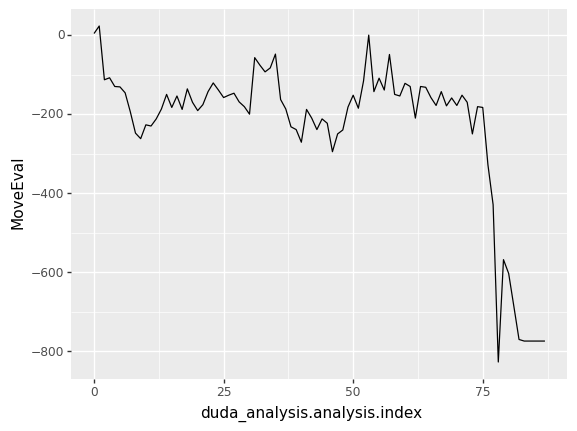

<ggplot: (379404156)>

In [ ]:
gg.ggplot(duda_analysis.analysis, gg.aes(x='duda_analysis.analysis.index', y='MoveEval')) + gg.geom_line()